In [192]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
def calc_contribution_rank(hc, ci, sum_df):
    print("rank!")
    _hc = hc.copy()
    _test = list()

    for col in _hc:
        _hc_info = _hc[col].copy()

        contributions = list()
        for division_round, _ in enumerate(_hc_info):
            cluster_usage = ci[division_round][0][int(_)].sum()
            division_usage = sum_df.iloc[division_round][col]
            
            conts = ci[division_round][1]
            cont = rank(conts)[int(_)]
            
            panalty = (division_usage * 1000) / (cluster_usage * 1000)
            guarantee = 0 if panalty > 1 else panalty
            
            if panalty > 1:
                panalty = 1 - panalty
            else:
                panalty = 0
            
            contributions.append(
                cont + panalty - guarantee
            )

        _test.append(contributions.copy())

    contribution_df = pd.DataFrame(_test).T
    contribution_df.columns = hc.columns

    return contribution_df.round()

In [194]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, dimension_reduction, calc_contribution, calc_contribution_rank

In [377]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_all.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [378]:
# 4. day clustering
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.598,0.204,0.226,0.166,0.477,0.295,0.319,0.531,0.419,0.474
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.505,0.230,0.186,0.135,0.407,0.146,0.301,0.507,0.413,0.362
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.532,0.188,0.187,0.121,0.420,0.154,0.329,0.351,0.397,0.318
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.430,0.286,0.218,0.116,0.396,0.152,0.260,0.342,0.413,0.311
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.274,0.190,0.216,0.322,0.397,0.154,0.366,0.333,0.306,0.344


In [379]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 95.14099399232914
20 / 248 ==> 89.75870110070284
30 / 248 ==> 91.37684002252391
40 / 248 ==> 93.75893429719868
50 / 248 ==> 94.46934869325764
60 / 248 ==> 93.41228560398694
70 / 248 ==> 91.8084679458344
80 / 248 ==> 94.0178268854861
90 / 248 ==> 95.31078207966523
100 / 248 ==> 91.59359516784107
110 / 248 ==> 91.6856435513771
120 / 248 ==> 93.94382717088546
130 / 248 ==> 94.0426267446983
140 / 248 ==> 91.6426184103622
150 / 248 ==> 92.46649616612375
160 / 248 ==> 95.47914819335045
170 / 248 ==> 93.77320831993988
180 / 248 ==> 92.46370346140401
190 / 248 ==> 91.6070704873434
200 / 248 ==> 94.02309627345402
210 / 248 ==> 95.01925717950851
220 / 248 ==> 90.02810734792824
230 / 248 ==> 87.58753880074
240 / 248 ==> 92.11193889571125
248 / 248 ==> 91.89381636775869


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,7.0,11.0,2.0,3.0,5.0,1.0,11.0,9.0,9.0,1.0,...,8.0,11.0,11.0,1.0,8.0,9.0,7.0,8.0,13.0,13.0
1,6.0,6.0,6.0,5.0,0.0,8.0,8.0,2.0,8.0,8.0,...,13.0,6.0,12.0,4.0,7.0,8.0,9.0,9.0,13.0,9.0
2,11.0,11.0,11.0,1.0,9.0,5.0,6.0,5.0,5.0,13.0,...,0.0,3.0,8.0,8.0,7.0,5.0,7.0,3.0,6.0,4.0
3,6.0,5.0,10.0,3.0,10.0,2.0,7.0,8.0,13.0,6.0,...,9.0,5.0,7.0,10.0,12.0,5.0,12.0,0.0,7.0,4.0
4,6.0,5.0,5.0,0.0,5.0,9.0,11.0,11.0,1.0,7.0,...,4.0,7.0,6.0,11.0,13.0,6.0,2.0,6.0,1.0,11.0


In [380]:
data_np = df.values
division_data_np = data_np.reshape(-1, size, len(data_np[0]))

sum_division_data_np = division_data_np.sum(axis=1)
sum_df = pd.DataFrame(
    sum_division_data_np,
    columns=df.columns,
    index=df.index[::size]
)

In [381]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

rank!


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
2018-05-01 00:00:00,8.0,5.0,9.0,1.0,2.0,3.0,5.0,5.0,5.0,3.0,...,12.0,5.0,5.0,3.0,12.0,5.0,8.0,12.0,11.0,11.0
2018-05-01 03:00:00,6.0,6.0,6.0,1.0,2.0,4.0,4.0,9.0,4.0,4.0,...,12.0,6.0,8.0,8.0,13.0,4.0,12.0,12.0,12.0,12.0
2018-05-01 06:00:00,3.0,3.0,3.0,1.0,2.0,4.0,7.0,4.0,4.0,7.0,...,5.0,10.0,8.0,8.0,11.0,4.0,11.0,10.0,7.0,9.0
2018-05-01 09:00:00,3.0,5.0,2.0,1.0,2.0,5.0,8.0,7.0,12.0,3.0,...,10.0,5.0,8.0,2.0,11.0,5.0,11.0,7.0,8.0,10.0
2018-05-01 12:00:00,4.0,2.0,2.0,1.0,2.0,5.0,7.0,7.0,9.0,4.0,...,10.0,4.0,4.0,7.0,13.0,4.0,11.0,4.0,9.0,7.0


# 해결과제 : kWh가 높은데도, 기여도가 적게나오는 가구 분석

In [382]:
cnt = 0

sum_df = df.sum().round()
cont_mean_df = contribution_df.mean().round()
_UFO = list()
_UFO_cont = list()

for col in df:
    _me = sum_df[col]
    targets = sum_df[sum_df > _me].index
    
    for t_col in targets:
        _target = sum_df[t_col]
        me_cont = cont_mean_df[col]
        t_cont = cont_mean_df[t_col]
        
        if me_cont > t_cont:
            cnt += 1
            if t_col not in _UFO:
                _UFO.append(t_col)
                _UFO_cont.append(t_cont)
            print(col, t_col,_me, _target ,me_cont, t_cont, "오차 : {}".format(me_cont - t_cont))
            

print("에러 개수 : {}".format(cnt))
print("미확인 가구({}) : {}".format(len(_UFO),_UFO))
print("{}".format(_UFO_cont))

아파트1-103-402 아파트3-101-405 224.0 225.0 7.0 6.0 오차 : 1.0
아파트1-103-502 아파트1-103-106 292.0 330.0 9.0 8.0 오차 : 1.0
아파트1-103-1502 아파트4-103-805 367.0 371.0 11.0 10.0 오차 : 1.0
아파트1-103-1502 아파트4-103-807 367.0 373.0 11.0 10.0 오차 : 1.0
아파트1-103-1502 아파트4-103-906 367.0 372.0 11.0 10.0 오차 : 1.0
아파트1-103-1502 아파트4-103-508 367.0 388.0 11.0 10.0 오차 : 1.0
아파트1-103-202 아파트1-103-106 305.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-903 아파트1-103-106 290.0 330.0 9.0 8.0 오차 : 1.0
아파트1-101-402 아파트1-103-106 312.0 330.0 9.0 8.0 오차 : 1.0
아파트1-101-1403 아파트1-102-802 418.0 419.0 12.0 11.0 오차 : 1.0
아파트1-101-1403 아파트4-103-708 418.0 422.0 12.0 11.0 오차 : 1.0
아파트1-101-904 아파트3-101-1602 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-904 아파트3-101-403 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-904 아파트4-103-101 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-504 아파트1-103-106 293.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-104 아파트1-103-106 301.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-301 아파트1-103-106 313.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-1501 아파트3-101-405 224.0 225.0 7.0 6.0

아파트3-102-1702 아파트3-101-1001 317.0 319.0 10.0 9.0 오차 : 1.0
아파트3-102-1702 아파트3-102-702 317.0 319.0 10.0 9.0 오차 : 1.0
아파트3-102-1702 아파트4-103-707 317.0 319.0 10.0 9.0 오차 : 1.0
아파트3-102-1702 아파트4-103-106 317.0 329.0 10.0 9.0 오차 : 1.0
아파트3-103-922 아파트1-103-801 183.0 189.0 6.0 5.0 오차 : 1.0
아파트3-103-922 아파트3-102-1105 183.0 184.0 6.0 5.0 오차 : 1.0
아파트3-102-801 아파트1-103-106 319.0 330.0 10.0 8.0 오차 : 2.0
아파트3-102-801 아파트1-101-1504 319.0 320.0 10.0 9.0 오차 : 1.0
아파트3-102-801 아파트4-103-106 319.0 329.0 10.0 9.0 오차 : 1.0
아파트3-102-1605 아파트1-103-106 313.0 330.0 9.0 8.0 오차 : 1.0
아파트3-103-2012 아파트3-103-820 77.0 79.0 3.0 2.0 오차 : 1.0
아파트3-101-201 아파트1-103-106 291.0 330.0 9.0 8.0 오차 : 1.0
아파트3-101-1905 아파트1-103-106 306.0 330.0 9.0 8.0 오차 : 1.0
아파트3-103-325 아파트4-103-805 366.0 371.0 11.0 10.0 오차 : 1.0
아파트3-103-325 아파트4-103-807 366.0 373.0 11.0 10.0 오차 : 1.0
아파트3-103-325 아파트4-103-906 366.0 372.0 11.0 10.0 오차 : 1.0
아파트3-103-325 아파트4-103-508 366.0 388.0 11.0 10.0 오차 : 1.0
아파트3-102-1503 아파트1-103-106 295.0 330.0 9.0

In [383]:
cols = df.columns

In [384]:
cols

Index(['아파트1-104-1206', '아파트1-104-303', '아파트1-104-1307', '아파트1-104-1208',
       '아파트1-104-408', '아파트1-104-203', '아파트1-103-1402', '아파트1-103-402',
       '아파트1-103-1201', '아파트1-103-801',
       ...
       '아파트4-105-102', '아파트4-103-1102', '아파트4-105-601', '아파트4-104-1501',
       '아파트4-103-702', '아파트4-102-104', '아파트4-103-902', '아파트4-101-602',
       '아파트4-103-905', '아파트4-101-104'],
      dtype='object', length=398)

In [385]:
# 미확인 가구는 어디에 속하는것이 맞는가?
cols = df.columns
for _ufo_idx, value in enumerate(_UFO):
    UFO_NAME = _UFO[_ufo_idx]
    UFO_cont = _UFO_cont[_ufo_idx]

    sum_df = df.sum()
    
    
    UFO_kwh = sum_df[UFO_NAME]
    
    now_idx = [_ not in _UFO for _ in df.columns]
    now_cont = sum_df[now_idx][cont_mean_df == UFO_cont]
    next_cont = sum_df[cont_mean_df == (UFO_cont + 1)]
    
    print("--------------------------------")
    print("현재 cont rank: {}".format(UFO_cont))
    print("현재 cont max: {}kWh".format(now_cont.max()))
    print("UFO : {}kWh".format(UFO_kwh))
    print("다음 cont rank : {}".format(UFO_cont + 1))
    print("다음 cont min : {}kWh".format(next_cont.min()))
    print()
    
    now_err = abs(now_cont.max() - UFO_kwh)
    next_err = abs(next_cont.min() - UFO_kwh)
    print("해당 가구({})는 {} rank {} 가 적합합니다.".format(
        UFO_NAME,
      "다음" if  now_err > next_err else "현재",
       UFO_cont + 1 if now_err > next_err else UFO_cont
    ))
    
    if now_err > next_err:
        cont_mean_df[UFO_NAME] += 1
    
    print("--------------------------------\n")

--------------------------------
현재 cont rank: 6.0
현재 cont max: 208.48399999999998kWh
UFO : 225.05599999999998kWh
다음 cont rank : 7.0
다음 cont min : 210.289kWh

해당 가구(아파트3-101-405)는 다음 rank 7.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 8.0
현재 cont max: 275.116kWh
UFO : 330.257kWh
다음 cont rank : 9.0
다음 cont min : 274.874kWh

해당 가구(아파트1-103-106)는 현재 rank 8.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 10.0
현재 cont max: 357.058kWh
UFO : 370.972kWh
다음 cont rank : 11.0
다음 cont min : 365.543kWh

해당 가구(아파트4-103-805)는 다음 rank 11.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 10.0
현재 cont max: 357.058kWh
UFO : 372.98699999999997kWh
다음 cont rank : 11.0
다음 cont min : 365.543kWh

해당 가구(아파트4-103-807)는 다음 rank 11.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 10.0
현재 cont max: 357.058kWh
UFO : 372.461kWh
다음 cont rank : 1

--------------------------------
현재 cont rank: 2.0
현재 cont max: 57.134kWh
UFO : 74.906kWh
다음 cont rank : 3.0
다음 cont min : 57.20399999999999kWh

해당 가구(아파트1-104-408)는 다음 rank 3.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 2.0
현재 cont max: 57.134kWh
UFO : 63.06700000000001kWh
다음 cont rank : 3.0
다음 cont min : 57.20399999999999kWh

해당 가구(아파트1-104-404)는 다음 rank 3.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 1.0
현재 cont max: 18.313000000000002kWh
UFO : 18.759kWh
다음 cont rank : 2.0
다음 cont min : 17.500999999999998kWh

해당 가구(아파트2-2-1004)는 현재 rank 1.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 4.0
현재 cont max: 140.113kWh
UFO : 150.428kWh
다음 cont rank : 5.0
다음 cont min : 140.76299999999998kWh

해당 가구(아파트1-104-303)는 다음 rank 5.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 4.0
현재 cont max: 140.113kWh
UFO : 149.46800

In [386]:
cnt = 0

sum_df = df.sum().round()
_UFO = list()
_UFO_cont = list()

for col in df:
    _me = sum_df[col]
    targets = sum_df[sum_df > _me].index
    
    for t_col in targets:
        _target = sum_df[t_col]
        me_cont = cont_mean_df[col]
        t_cont = cont_mean_df[t_col]
        
        if me_cont > t_cont:
            cnt += 1
            if t_col not in _UFO:
                _UFO.append(t_col)
                _UFO_cont.append(t_cont)
            print(col, t_col,_me, _target ,me_cont, t_cont, "오차 : {}".format(me_cont - t_cont))
            

print("에러 개수 : {}".format(cnt))
print("미확인 가구({}) : {}".format(len(_UFO),_UFO))
print("{}".format(_UFO_cont))

아파트1-103-502 아파트1-103-106 292.0 330.0 9.0 8.0 오차 : 1.0
아파트1-103-202 아파트1-103-106 305.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-903 아파트1-103-106 290.0 330.0 9.0 8.0 오차 : 1.0
아파트1-101-402 아파트1-103-106 312.0 330.0 10.0 8.0 오차 : 2.0
아파트1-101-1403 아파트1-102-802 418.0 419.0 12.0 11.0 오차 : 1.0
아파트1-101-1403 아파트4-103-708 418.0 422.0 12.0 11.0 오차 : 1.0
아파트1-101-904 아파트3-101-1602 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-904 아파트3-101-403 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-904 아파트4-103-101 244.0 247.0 8.0 7.0 오차 : 1.0
아파트1-101-504 아파트1-103-106 293.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-104 아파트1-103-106 301.0 330.0 9.0 8.0 오차 : 1.0
아파트1-102-301 아파트1-103-106 313.0 330.0 10.0 8.0 오차 : 2.0
아파트1-102-1002 아파트1-103-106 297.0 330.0 9.0 8.0 오차 : 1.0
아파트1-103-505 아파트1-103-106 303.0 330.0 9.0 8.0 오차 : 1.0
아파트1-103-1805 아파트1-102-802 409.0 419.0 12.0 11.0 오차 : 1.0
아파트1-103-1805 아파트1-101-1302 409.0 414.0 12.0 11.0 오차 : 1.0
아파트1-103-1805 아파트4-103-708 409.0 422.0 12.0 11.0 오차 : 1.0
아파트1-103-1104 아파트1-103-106 312.0 330.0 10.0 8

# 간격 체크

In [387]:
min_max_list = list()
sum_df = df.sum()

for _check_cont in set(cont_mean_df):
    _check_df = sum_df[cont_mean_df == _check_cont]
    
    min_max_list.append([
        _check_df.min(),
        _check_df.max()
    ])

_next_err_list = list()

for idx in range(0,len(min_max_list) - 1):
    _now = min_max_list[idx]
    _next = min_max_list[idx + 1]
    
    _next_err_list.append(
        abs(_now[1] - _next[0])
    )
    
_next_err_np = np.array(_next_err_list)
_next_mean = _next_err_np.mean()

print(_next_err_np)
print(_next_mean)

[18.395  0.07   0.48   0.65   1.543  1.805  5.079 55.383  0.75   8.485
 23.857]
10.590636363636362


In [388]:
DAY_ARR = ["월", "화", "수", "목", "금", "토", "일"]
day_cont_np = np.array([])

for weekday in range(0, 7):
    day_cont = contribution_df.loc[
        contribution_df.index.weekday == weekday
    ].mean().round().values
    day_cont_np = np.append(
        day_cont_np,
        day_cont
    )
    
day_cont_df = pd.DataFrame(
    day_cont_np.reshape(7, -1),
    columns=df.columns,
    index=DAY_ARR
)
day_cont_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
월,5.0,4.0,5.0,1.0,3.0,4.0,6.0,7.0,6.0,6.0,...,8.0,6.0,5.0,5.0,8.0,3.0,11.0,11.0,8.0,9.0
화,5.0,4.0,3.0,1.0,2.0,5.0,6.0,7.0,7.0,6.0,...,9.0,6.0,5.0,5.0,8.0,4.0,11.0,11.0,8.0,9.0
수,5.0,4.0,4.0,1.0,2.0,5.0,6.0,7.0,6.0,6.0,...,8.0,6.0,4.0,4.0,8.0,4.0,11.0,12.0,7.0,9.0
목,4.0,4.0,5.0,1.0,2.0,5.0,7.0,7.0,6.0,5.0,...,9.0,6.0,5.0,5.0,8.0,4.0,11.0,11.0,8.0,10.0
금,5.0,4.0,5.0,1.0,4.0,5.0,7.0,7.0,5.0,5.0,...,9.0,5.0,5.0,4.0,8.0,4.0,12.0,12.0,8.0,9.0
토,5.0,5.0,6.0,1.0,2.0,5.0,7.0,7.0,6.0,5.0,...,7.0,8.0,4.0,5.0,7.0,3.0,10.0,12.0,8.0,10.0
일,6.0,5.0,7.0,1.0,2.0,4.0,6.0,7.0,5.0,5.0,...,9.0,6.0,4.0,4.0,8.0,4.0,11.0,11.0,8.0,10.0


In [275]:
data_np = df.values
division_data_np = data_np.reshape(-1, size, len(data_np[0]))

sum_division_data_np = division_data_np.sum(axis=1)
sum_df = pd.DataFrame(
    sum_division_data_np,
    columns=df.columns,
    index=contribution_df.index
)

day_sum_np = np.array([])
for weekday in range(0, 7):
    day_sum = sum_df.loc[
        sum_df.index.weekday == weekday
    ].sum().round().values
    day_sum_np = np.append(
        day_sum_np,
        day_sum
    )
    
day_sum_df = pd.DataFrame(
    day_sum_np.reshape(7, -1),
    columns=df.columns,
    index=DAY_ARR
)
day_sum_df

,아파트3-102-603,아파트3-102-901,아파트3-102-1205,아파트3-102-302,아파트3-102-1001,아파트3-102-701,아파트3-102-903,아파트3-102-1803,아파트3-101-1405,아파트3-103-1609,...,아파트3-101-1307,아파트3-101-1207,아파트3-103-1622,아파트3-103-1309,아파트3-103-311,아파트3-103-322,아파트3-101-106,아파트3-103-1911,아파트3-103-612,아파트3-103-1418
월,34.0,37.0,23.0,39.0,39.0,33.0,32.0,18.0,36.0,28.0,...,21.0,20.0,32.0,32.0,43.0,26.0,25.0,27.0,32.0,8.0
화,33.0,43.0,29.0,50.0,52.0,41.0,40.0,23.0,41.0,37.0,...,27.0,26.0,38.0,40.0,56.0,36.0,32.0,39.0,41.0,9.0
수,37.0,40.0,30.0,48.0,56.0,44.0,38.0,33.0,41.0,35.0,...,29.0,25.0,36.0,40.0,50.0,34.0,33.0,38.0,44.0,9.0
목,37.0,38.0,27.0,47.0,48.0,41.0,39.0,25.0,39.0,34.0,...,26.0,26.0,39.0,40.0,50.0,34.0,31.0,37.0,44.0,10.0
금,33.0,36.0,22.0,40.0,38.0,34.0,31.0,20.0,31.0,26.0,...,22.0,20.0,32.0,31.0,45.0,24.0,24.0,28.0,34.0,6.0
토,33.0,34.0,22.0,33.0,33.0,33.0,33.0,20.0,37.0,28.0,...,22.0,22.0,33.0,32.0,43.0,26.0,25.0,22.0,31.0,8.0
일,30.0,34.0,21.0,47.0,40.0,39.0,31.0,19.0,34.0,30.0,...,22.0,24.0,37.0,37.0,42.0,32.0,24.0,27.0,29.0,7.0


In [278]:
print("전체 특징")
print(day_sum_df.mean(axis=1))
print()

print("미확인 가구 정보")
for UFO in _UFO:
    print(UFO)
    print(day_cont_df[UFO])
    print()

전체 특징
월    29.190909
화    35.872727
수    36.454545
목    35.309091
금    28.790909
토    29.790909
일    30.536364
dtype: float64

미확인 가구 정보
아파트3-103-1726
월    4.0
화    5.0
수    5.0
목    5.0
금    5.0
토    4.0
일    4.0
Name: 아파트3-103-1726, dtype: float64

아파트3-103-1302
월    2.0
화    1.0
수    2.0
목    1.0
금    1.0
토    1.0
일    1.0
Name: 아파트3-103-1302, dtype: float64



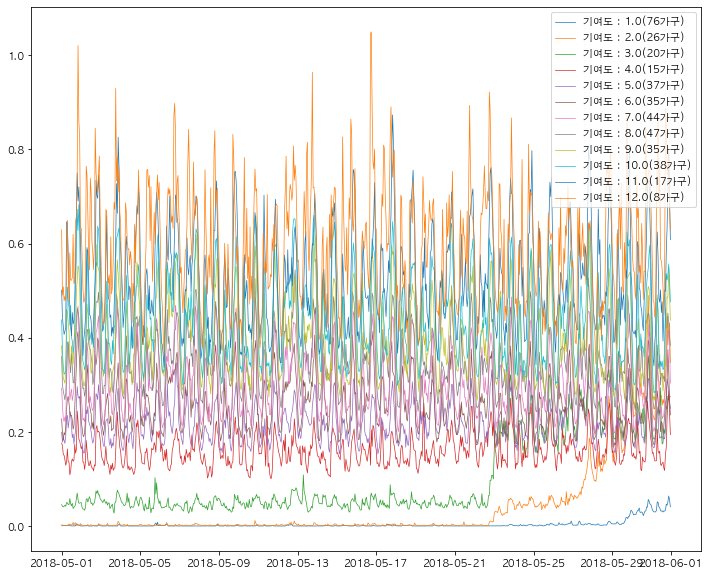

In [389]:
cols = df.columns

plt.figure(figsize=(12,10))


for cont in set(cont_mean_df):
    hh = df[cols[cont_mean_df == cont]]
    pat = hh.mean(axis=1)
    
    plt.plot(pat, label="기여도 : {}({}가구)".format(cont, len(hh.columns)), linewidth=0.7)
    
plt.legend()
plt.show()

# 기여도 병합

# Day Contribution Analysis

In [ ]:
# 아파트1-103-1805 아파트1-102-802
# 아파트1-104-1307 아파트1-104-1206

A_col = "아파트1-104-1307"
B_col = "아파트1-104-1206"

print(day_cont_df[A_col])
print(day_sum_df[A_col])
print(day_cont_df[B_col])
print(day_sum_df[B_col])

# Day Analysis

In [ ]:
A_col = ""
B_col = ""

# Time Analysis